# Color Recognition 
**My goal for this program was to make a neural network that could recognize the color of objects it sees. I felt that this would be useful to colorblind people, such as myself. Bellow is my code and explanations of each block of code I wrote.**

This code block imports tensorflow and google drive files into the program.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code block imports all the test and training images and turns them into an array.

In [ ]:
#--------Training Images---------
import os
import numpy as np

image_width = 100
image_height = 100

def get_class_directories(root_dataset_directory = "drive/MyDrive/ColorClassification"): 
  class_directories= {}
  for file_name in os.listdir(root_dataset_directory):
    file_path = os.path.join(root_dataset_directory, file_name)
    if os.path.isdir(file_path) and file_name != ".ipynb_checkpoints":
      class_directories[file_name] = file_path
  return class_directories    

def load_images_in_directory(directory_name):
  output_images = []
  for file_name in os.listdir(directory_name):
    file_path = os.path.join(directory_name, file_name)
    image = keras.utils.load_img(file_path, target_size=(image_height, image_width))
    image = keras.utils.img_to_array(image)
    output_images.append(image)
  if len(output_images) > 0:
    output_images = np.stack(output_images)
  return output_images



train_dataset = {
    class_name: load_images_in_directory(class_directory)
    for class_name, class_directory in get_class_directories().items()
}
#--------Test Images---------
test_dataset = {
    class_name: load_images_in_directory(class_directory)
    for class_name, class_directory in get_class_directories("/content/drive/MyDrive/TestImages").items()
}

This code block prints the class names of the colors and shapes of each color's array. 

In [ ]:
for class_name, dataset in train_dataset.items():
  print(class_name, dataset.shape)
for class_name, dataset in test_dataset.items():
  print(class_name, dataset.shape)

Violet (158, 100, 100, 3)
red (174, 100, 100, 3)
yellow (164, 100, 100, 3)
orange (142, 100, 100, 3)
White (130, 100, 100, 3)
Green (165, 100, 100, 3)
Brown (118, 100, 100, 3)
Black (132, 100, 100, 3)
Blue (204, 100, 100, 3)
Black (20, 100, 100, 3)
Blue (20, 100, 100, 3)
Brown (20, 100, 100, 3)
Green (20, 100, 100, 3)
orange (20, 100, 100, 3)
yellow (20, 100, 100, 3)
Violet (20, 100, 100, 3)
red (20, 100, 100, 3)
White (20, 100, 100, 3)


This code block makes a function that sorts the class names.

In [ ]:
#------Training Images--------
def labeled_images(dataset): 
  class_names_sorted = list(sorted(dataset.keys()))
  print(class_names_sorted)
  output_labels = {}

  for i, class_name in enumerate(class_names_sorted):
    number_of_examples = dataset[class_name].shape[0]
    number_of_rows = number_of_examples
    number_of_colums = len(class_names_sorted)
    shape = (number_of_rows, number_of_colums)
    output = np.zeros((number_of_examples, len(class_names_sorted))) 
    output[:, i] = 1
    output_labels[class_name] = output
  return output_labels

This code block uses the function above to sort the color labels.

In [ ]:
train_labels = labeled_images(train_dataset)
test_labels = labeled_images(test_dataset)

['Black', 'Blue', 'Brown', 'Green', 'Violet', 'White', 'orange', 'red', 'yellow']
['Black', 'Blue', 'Brown', 'Green', 'Violet', 'White', 'orange', 'red', 'yellow']


This code block prints the number of images within each color name, and the total amount of color names there are.

In [ ]:
for class_name, dataset in train_labels.items():
  print(class_name, dataset.shape)
for class_name, dataset in test_labels.items():
  print(class_name, dataset.shape)

Black (132, 9)
Blue (204, 9)
Brown (118, 9)
Green (165, 9)
Violet (158, 9)
White (130, 9)
orange (142, 9)
red (174, 9)
yellow (164, 9)
Black (20, 9)
Blue (20, 9)
Brown (20, 9)
Green (20, 9)
Violet (20, 9)
White (20, 9)
orange (20, 9)
red (20, 9)
yellow (20, 9)


This code block creates a function that stacks all the color arrays in the testing and training image sets into one array.

In [ ]:
def stack_dataset_classes(dataset): 
  class_names_sorted = list(sorted(dataset.keys()))
  all_images = []
  for class_name in class_names_sorted:
    all_images.append(dataset[class_name])
  stack_arrays = np.vstack(all_images)
  return stack_arrays 


This stacks all the color arrays from the test images and training images into one testing array and one training array.

In [ ]:
inputs = stack_dataset_classes(train_dataset)
print(inputs.shape)
outputs = stack_dataset_classes(train_labels)
print(outputs.shape)
test_inputs = stack_dataset_classes(test_dataset)
print(test_inputs.shape)
test_outputs = stack_dataset_classes(test_labels)
print(test_outputs.shape)

(1387, 100, 100, 3)
(1387, 9)
(180, 100, 100, 3)
(180, 9)


This block of code creates the learning model and determines the neuron layers that the learning model has.

In [ ]:
number_of_classes = len(train_dataset)
number_of_color_channels = 3



model = keras.Sequential(
    [
        keras.Input(shape=(image_height, image_width, number_of_color_channels), name="image"),
        layers.Conv2D(16, 5),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(number_of_classes, name="final_outputs"),
    ]
)
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 16)        1216      
                                                                 
 flatten_6 (Flatten)         (None, 147456)            0         
                                                                 
 dense_14 (Dense)            (None, 64)                9437248   
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 final_outputs (Dense)       (None, 9)                 585       
                                                                 
Total params: 9,443,209
Trainable params: 9,443,209
Non-trainable params: 0
_________________________________________________________________
None


This block of code sets the learning rate, batch size, shuffles the datasets, and creates validation datasets.

---



In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5) 

loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)

batch_size = 20

validation_set_size = int(len(test_inputs)*.1)
shuffle_index = list(range(len(test_inputs)))
np.random.shuffle(shuffle_index) 
shuffle_inputs = test_inputs[list(shuffle_index),:]
print(shuffle_inputs.shape)


shuffle_outputs = test_outputs[list(shuffle_index),:]
print(shuffle_outputs.shape)

inputs_val = shuffle_inputs[:-validation_set_size]
outputs_val = shuffle_outputs[:-validation_set_size]
inputs_test = shuffle_inputs[-validation_set_size:]
outputs_test = shuffle_outputs[-validation_set_size:]
train_dataset = tf.data.Dataset.from_tensor_slices((inputs, outputs))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((inputs_val, outputs_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((inputs_test, outputs_test))
test_dataset = test_dataset.batch(batch_size)

(180, 100, 100, 3)
(180, 9)


This block of code makes a function that will graph the loss and accuracy of the training model at each epoch.

In [ ]:
import matplotlib.pyplot as plt

def plot_model_losses(training_metrics: list, testing_metrics: list, metric_name: str = 'Loss'):
  plt.figure()
  epochs_training = list(range(len(training_metrics)))
  epochs_testing = list(range(len(testing_metrics)))
  plt.plot(epochs_training, training_metrics, 'b-o', label='Training')
  plt.plot(epochs_testing, testing_metrics, 'r-o', label='Testing')
  plt.xlabel('Epochs')
  plt.ylabel(metric_name)
  plt.title(f'Model Performance - {metric_name}')
  plt.legend()
  plt.show()
  plt.savefig(f'model_performance_{metric_name}.png')

This block of code creates the training loop, trains the moddel, and uses the function above to graph the accuracy and loss of the model throughout the training

<Figure size 432x288 with 0 Axes>

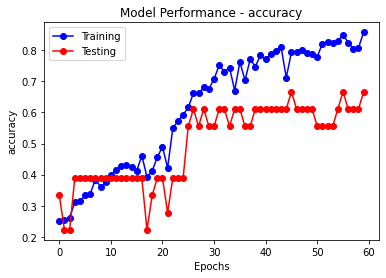

<Figure size 432x288 with 0 Axes>

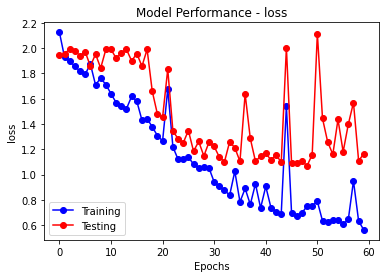

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import clear_output

epochs = 60
train_metrics = {}
test_metrics = {}

model.compile(optimizer, loss_fn, metrics=['accuracy'])

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    for step, (inputs_batch, outputs_batch) in enumerate(train_dataset):
       with tf.GradientTape() as tape:
           logits = model(inputs_batch, training=True)
           loss_value = loss_fn(outputs_batch, logits)
       grads = tape.gradient(loss_value, model.trainable_weights)
       optimizer.apply_gradients(zip(grads, model.trainable_weights))
    test_result = model.evaluate(test_dataset)
    for metric_name, metric_value in zip(model.metrics_names, test_result):
      if metric_name not in test_metrics:
        test_metrics[metric_name] = []
      test_metrics[metric_name].append(metric_value)
    train_result = model.evaluate(train_dataset)
    for metric_name, metric_value in zip(model.metrics_names, train_result):
      if metric_name not in train_metrics:
        train_metrics[metric_name] = []     
      train_metrics[metric_name].append(metric_value)
    clear_output()
    for metric_name in sorted(train_metrics.keys()):
      plot_model_losses(train_metrics[metric_name], test_metrics[metric_name], metric_name)

This line code saves the trained model.

In [ ]:
model.save('MyModel')

INFO:tensorflow:Assets written to: MyModel/assets


This line of code saves the trained model as a variable

In [ ]:
loaded_model = keras.models.load_model("MyModel")

This line of code makes it possible to take a photo in Google Collab.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
 

This code block takes a picture and uses the model to make a prediction on what color the picture is. 

In [ ]:
import os
os.makedirs("ColorPredictions", exist_ok=True)

file_name = take_photo("ColorPredictions/color.jpg", 0.8)
output = load_images_in_directory("/content/ColorPredictions")
normalized = output / np.max(output)
out_image = loaded_model.predict(normalized)
labels = [line for line in open("Labels.txt")]
print(labels[np.argmax(out_image)])


<IPython.core.display.Javascript object>

Green 

